This program will demostrate the K-Means clustering algorithm
Successfully loaded the dataset
Final Index:  0.5000696034925255  with value of K =  2


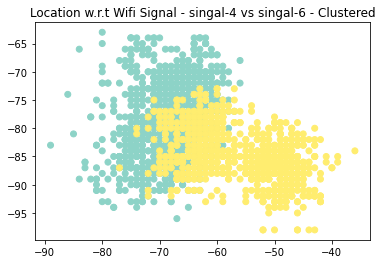

Now we will de clustering with a more suitable dataset
DaviesBouldinIndex:  0.5789658115737809  with value of K =  2
DaviesBouldinIndex:  0.6225780751846827  with value of K =  3
DaviesBouldinIndex:  0.4544911694031557  with value of K =  4
DaviesBouldinIndex:  0.46816284800554986  with value of K =  5
DaviesBouldinIndex:  0.43379936303992794  with value of K =  6
DaviesBouldinIndex:  0.4722651230279431  with value of K =  7
DaviesBouldinIndex:  0.4671810820627587  with value of K =  8
DaviesBouldinIndex:  0.3957724763862804  with value of K =  9
Final Index:  0.3957724763862804  with value of K =  9


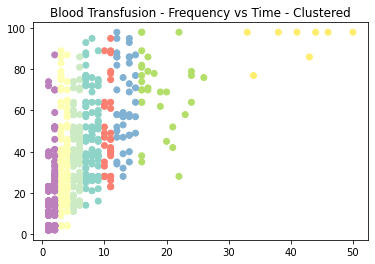

In [2]:
#-------------------------------------------Aitzaz Ahmad--------------------------------------------
#-------------------------------------------18I-0589-----------------------------------------------

import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def load_data_from_file(filename):
    with open(filename, 'r') as dataFile:
        lines = [line.split() for line in dataFile]
        dataSet = list(lines)
        dataSet1 = np.arange(len(dataSet)*len(dataSet[0])).reshape(len(dataSet),len(dataSet[0]))
        for i in range(len(dataSet)):
                for j in range(7):
                    dataSet1[i][j] = float(dataSet[i][j])
    return dataSet1

#This function calculates distacne between two rows of datasets which act like 1-d arrays
def euclidean(row1,row2):
    distance_so_far = 0
    for i in range(len(row1)):
        distance_so_far += pow((row1[i] - row2[i]), 2)
    return math.sqrt(distance_so_far)
    
def DaviesBouldinIndex(dataSet, labels,noOfCluster):
    kClusters = [dataSet[labels == k] for k in range(noOfCluster)]
    centroids = [np.mean(k, axis = 0) for k in kClusters]
    val = []
    variances = []
    for i, k in enumerate(kClusters):
        sum = 0
        for p in k:
            sum+=euclidean(p,centroids[i])
        if(len(k) == 0):
            variances.append(0)
            val.append(i)
        else:
            variances.append(sum/(len(k)))
    Ri = []
    for i in range(noOfCluster):
        Rij = []
        if i not in val:
            for j in range(noOfCluster):
                if j != i and j not in val:
                        r = (variances[i] + variances[j]) / euclidean(centroids[i], centroids[j])
                        Rij.append(r)
            Ri.append(max(Rij)) 
    dbi = np.mean(Ri)
    if(np.isnan(dbi)):
        dbi = 0
    return dbi

#This calculates distance of a row from whole matrix and stores the results in array
def calculate_euclidean_distance(matrix, row):
    distance = 0
    list1 = []
    for k in range(len(matrix)):
        list = []
        for i in range(len(row)):
            for j in range(len(row[i])):
                distance += pow((row[i][j] - matrix[k][j]), 2)
            list.append(math.sqrt(distance))
            distance = 0
        list1.append(list)
    return np.array(list1)

def find_closest_centroids(X, centroids):
    '''returns the array of assigned clusters to each example ''' 
    m = X.shape[0] # no of datappints
    k = centroids.shape[0]  #division size
    idx = np.zeros(m) # array to assign the centriod
    
    for i in range(m):
        minimum = 1000000
        for j in range(k):
            distance = np.linalg.norm(X[i,:] - centroids[j,:], axis=0)
            if distance <= minimum:
                minimum = distance
                idx[i] = j 
    return idx

def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n)) 
    m, n = X.shape
    centroids = np.zeros((k, n))
    for i in range(k):
        centroids[i, :] = np.mean(X[idx.ravel() == i, :], axis=0)
    return centroids

def KMeans(dataSet,K):
    #calculating the initial centroids randomly
    centroids = (dataSet[np.random.choice(dataSet.shape[0], K)])
    idx = np.zeros(len(dataSet))
    #assigning the datapoints to respective centroids
    for i in range(15):
        idx = find_closest_centroids(dataSet, centroids)
        centroids = compute_centroids(dataSet, idx, K)
            
    return idx
    
    
def main():
    print("This program will demostrate the K-Means clustering algorithm")
    #loading the dataset
    my_data = load_data_from_file("wifi_localization.txt")
    print("Successfully loaded the dataset")
    
    #now we will calculate the optimal value of K by Davies Bouldin Index
    prevIndex = 0
    K = 3
    val = []
    for k in range(2,10,1):
        K = k
        labels = KMeans(my_data, k)
        newIndex = DaviesBouldinIndex(my_data,labels,k)
        val.append((newIndex,k))

    val.sort(key=lambda x:x[0])
    index,K = val[0]
    labels = KMeans(my_data, K)

    print("Final Index: ",index," with value of K = ",K)
    plt.scatter(my_data[:,4], my_data[:,6], c=labels, cmap='Set3')
    plt.title('Location w.r.t Wifi Signal - singal-4 vs singal-6 - Clustered')
    plt.show()

    print("Now we will de clustering with a more suitable dataset")
    dataFrame = pd.read_csv('transfusion.data', header=None)
    dataFrame.columns = ['Recency', 'Frequency', 'Monetary', 'Time', 'Result']

    X = dataFrame[['Recency', 'Frequency', 'Monetary', 'Time']]
    y = dataFrame['Result']
    X.head()
    my_data = X.values
    prevIndex = 0
    K = 3
    val = []
    for k in range(2,10,1):
        K = k
        labels = KMeans(my_data, k)
        newIndex = DaviesBouldinIndex(my_data,labels,k)
        val.append((newIndex,k))
        print("DaviesBouldinIndex: ",newIndex," with value of K = ",k)

    val.sort(key=lambda x:x[0])
    index,K = val[0]

    labels = KMeans(my_data, K)

    print("Final Index: ",index," with value of K = ",K)
    plt.scatter(X['Frequency'], X['Time'], c=labels, cmap='Set3')
    plt.title('Blood Transfusion - Frequency vs Time - Clustered')
    plt.show()

if __name__ == "__main__":
    main()
